#Assignment 3

# VERY IMPORTANT: Please make a copy (**File→Save a copy in Drive**) so that you can make changes in your file.

Submit your drive url link in the assignment submission page. Please also upload the dowloaded .ipynb file (File→Download->Download .ipynb).

Make sure you change the name of the collab page to your Name -  Assignment_3_FirstName_LastName

In this assignment, you'll work on building a simple CNN model and adding improvements.

For this assignment, the CIFAR-10 dataset was chosen, comprising 60,000 32x32 color images across 10 classes. The dataset was divided into training, validation, and test sets with appropriate preprocessing techniques.

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

Here are the classes in the dataset, as well as 10 random images from each:

* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck


In [135]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.models import Model


In [136]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#Implement a  CNN model to do image classification on cifar10 dataset and work on improving it

#Points 15

### Tasks 1: Data Exploration and Analysis

- Visualizing CIFAR 10 (display a few sample images from the dataset)
- Normalize the data
- Display the data shape of train, test data

##Points: 2

Training data shape:  (50000, 32, 32, 3) (50000, 1)
Test data shape:  (10000, 32, 32, 3) (10000, 1)


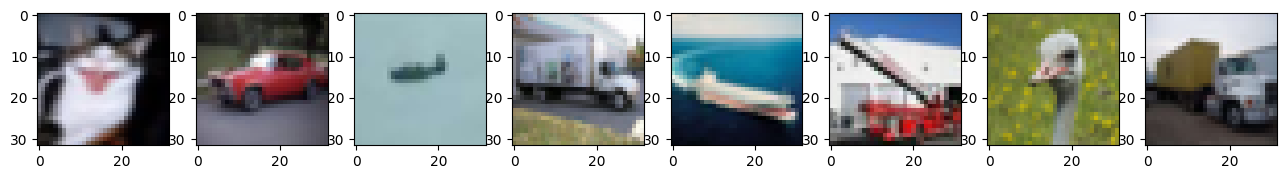

In [137]:
# Start code

# Import keras
import keras

# Display a few sample images from the dataset
# To display 8 images horizontally with a figure size of (16, 4)
figure, axes = plt.subplots(1, 8, figsize = (16, 4))

# For loop from 0 to 8 to show 8 sample images
for i in np.arange(0, 8):
  # Index generates a random integer from 0 to the length of training dataset
  idx = np.random.randint(0, len(x_train))

  # Display the sample image
  axes[i].imshow(x_train[idx])

# Normalize the data
# I did this in Task 2

# Display the data shape of train, test data
# Print data shape of train, test data
print("Training data shape: ", x_train.shape, y_train.shape)
print("Test data shape: ", x_test.shape, y_test.shape)

# End code

## Task 2: Change labels to categorical values (x_train and x_test) and Create train validation split (20% as validation)

## Points 1

In [138]:
# Start code

# Count the number of classes
num_classes = len(class_names)

# Create train validation split (20% as validation)
# Train, validation split
train_split, val_split = 0.8, 0.2

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = val_split)

# Normalize the data
x_val = x_val.astype('float32') / 255.
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Change labels to categorical values
# Convert labels to one-hot vectors
y_val = keras.utils.to_categorical(y_val, num_classes)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# End code

## Task 3: Define the CNN model architecture

## Points 2

In [139]:
'''
Define a CNN model with follow layers
- convolutional layer with 32 hidden units and (3,3) filter and relu activation
- max pooling layer with (2,2)
- flatten before connection to fully connected layers
- Dense layer with 128 hidden units
- Output layer with number of classes and the softmax activiation

Points 2
'''

# Start code

# Import Activation
from keras.layers import Activation

# Define a CNN model
model_1 = Sequential()
input_shape = (32, 32, 3)
print("Input dimensions: ", input_shape)

# Convolutional layer with 32 hidden units and (3,3) filter and relu activation
model_1.add(Conv2D(32, (3,3), input_shape = input_shape))
model_1.add(Activation('relu'))

# Max pooling layer with (2,2)
model_1.add(MaxPooling2D(pool_size = (2,2)))

# Flatten before connection to fully connected layers
model_1.add(Flatten())

# Dense layer with 128 hidden units
model_1.add(Dense(128))
model_1.add(Activation('relu'))

# Output layer with number of classes and the softmax activation
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

# End code

# Compile the model
model_1.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model_1.summary()

Input dimensions:  (32, 32, 3)
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 activation_84 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_39 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_23 (Flatten)        (None, 7200)              0         
                                                                 
 dense_46 (Dense)            (None, 128)               921728    
                                                                 
 activation_85 (Activation)  (None, 128)               0         
                      

In [140]:
# Train and fit
history1 = model_1.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))


Epoch 1/10
625/625 [==============================] - 4s 5ms/step - loss: 1.5409 - accuracy: 0.4507 - val_loss: 1.3265 - val_accuracy: 0.5303
Epoch 2/10
625/625 [==============================] - 3s 5ms/step - loss: 1.2450 - accuracy: 0.5655 - val_loss: 1.2097 - val_accuracy: 0.5820
Epoch 3/10
625/625 [==============================] - 4s 6ms/step - loss: 1.1364 - accuracy: 0.6016 - val_loss: 1.1514 - val_accuracy: 0.5950
Epoch 4/10
625/625 [==============================] - 3s 5ms/step - loss: 1.0463 - accuracy: 0.6367 - val_loss: 1.1117 - val_accuracy: 0.6076
Epoch 5/10
625/625 [==============================] - 4s 7ms/step - loss: 0.9668 - accuracy: 0.6622 - val_loss: 1.0725 - val_accuracy: 0.6327
Epoch 6/10
625/625 [==============================] - 3s 5ms/step - loss: 0.9053 - accuracy: 0.6861 - val_loss: 1.0524 - val_accuracy: 0.6360
Epoch 7/10
625/625 [==============================] - 4s 6ms/step - loss: 0.8381 - accuracy: 0.7089 - val_loss: 1.0534 - val_accuracy: 0.6396
Epoch 

## Task 4: Model Analysis

## Points 2

#### 4.1. Explain why do we use a softmax activation in the last layer of the network?

Points 1

**Answer**  : In order to provide a final output, fully connected layers often learn to recognize the complex patterns and relationships between features from the convolutional layers. The output of these fully connected layers are connected to a softmax activation function because the last layer of the network is there to make make the final output prediction. The softmax activation is an activation function that scales numbers/logits into probabilities, therefore needed as the last layer of the network to output the final output classifications.

#### 4.2. Do you think having more multiple convolutional and max pooling layers will improve the model? If so, why?

Points 1

**Answer**: I believe that having more multiple convolutional and max pooling layers would or would not improve the model, depending on the amount of layers added. Convolutional layers are there to detect features within an input image. Therefore, by adding multiple convolutional layers, it could help extract more features. However, if more convolutional layers are added than needed, it can start detecting features that do not classify the certain object. Adding multiple max pooling layers would or would not improve the model, depending on the amount of layers added as well. I believe that by adding an unnecessary amount of max pooling layers, it could cause an overfitting issue similar to adding too many convolutional layers.

## Task 5: Model 2

Points: 2

### 5.1 Create a new model (model_2) with additonal convolutional and max pooling layers


Points 1



In [141]:
'''

model_2 with following layers
- convolutional layer with 32 hidden units and (3,3) filter and relu activation
- max pooling layer with (2,2)
- convolutional layer with 64 hidden units and (3,3) filter and relu activation
- max pooling layer with (2,2)
- convolutional layer with 128 hidden units and (3,3) filter and relu activation
- max pooling layer with (2,2)
- flatten before connecting to fully connected layers
- Dense layer with 128 hidden units
- Output layer with number of classes and the softmax activiation

'''
# Start code

# Define a CNN model
model_2 = Sequential()
input_shape = (32, 32, 3)
print("Input dimensions: ", input_shape)

# Convolutional layer with 32 hidden units and (3,3) filter and relu activation
model_2.add(Conv2D(32, (3,3), input_shape = input_shape))
model_2.add(Activation('relu'))

# Max pooling layer with (2,2)
model_2.add(MaxPooling2D(pool_size = (2,2)))

# Convolutional layer with 64 hidden units and (3,3) filter and relu activation
model_2.add(Conv2D(64, (3,3), input_shape = input_shape))
model_2.add(Activation('relu'))

# Max pooling layer with (2,2)
model_2.add(MaxPooling2D(pool_size = (2,2)))

# Convolutional layer with 128 hidden units and (3,3) filter and relu activation
model_2.add(Conv2D(128, (3,3), input_shape = input_shape))
model_2.add(Activation('relu'))

# Max pooling layer with (2,2)
model_2.add(MaxPooling2D(pool_size = (2,2)))

# Flatten before connection to fully connected layers
model_2.add(Flatten())

# Dense layer with 128 hidden units
model_2.add(Dense(128))
model_2.add(Activation('relu'))

#Output layer with number of classes and the softmax activiation
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

# End code
model_2.summary()
model_2.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

Input dimensions:  (32, 32, 3)
Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 activation_87 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_41 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 activation_88 (Activation)  (None, 13, 13, 64)        0         
                                                                 
 max_pooling2d_41 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                

In [142]:
# Train and fit

history2 = model_2.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))


Epoch 1/10
625/625 [==============================] - 6s 7ms/step - loss: 1.6081 - accuracy: 0.4087 - val_loss: 1.4201 - val_accuracy: 0.4848
Epoch 2/10
625/625 [==============================] - 4s 6ms/step - loss: 1.2372 - accuracy: 0.5563 - val_loss: 1.2071 - val_accuracy: 0.5723
Epoch 3/10
625/625 [==============================] - 4s 6ms/step - loss: 1.0617 - accuracy: 0.6251 - val_loss: 1.0436 - val_accuracy: 0.6321
Epoch 4/10
625/625 [==============================] - 3s 5ms/step - loss: 0.9465 - accuracy: 0.6687 - val_loss: 1.0053 - val_accuracy: 0.6465
Epoch 5/10
625/625 [==============================] - 5s 7ms/step - loss: 0.8634 - accuracy: 0.7000 - val_loss: 0.9293 - val_accuracy: 0.6782
Epoch 6/10
625/625 [==============================] - 4s 6ms/step - loss: 0.7935 - accuracy: 0.7225 - val_loss: 0.9176 - val_accuracy: 0.6820
Epoch 7/10
625/625 [==============================] - 3s 5ms/step - loss: 0.7290 - accuracy: 0.7468 - val_loss: 0.9007 - val_accuracy: 0.6859
Epoch 

### 5.2 What do you think about the performance looking at the train accuracy and loss compared with the validation accuracy and loss? Why is this happening? How can we improve it?

Points 1

**Answer**: From looking at the performance, I can see that the train loss and the validation loss start off around the same, however throughout the performance, the validation loss is greater than the train loss. On the other hand, the train accuracy and the validation accuracy start off around the same, but throughout the performance, the train accuracy is greater than the validation accuracy.

I also see that the train loss and validation loss seem to steadily decrease. In addition, the train accuracy seems to steadily increase. However, the validation accuracy seems to increase but seems to plateau and become constant near the 8th epoch.

I believe that the validation accuracy slowly plateauing while the train accuracy continues to increase means that the model is experiencing overfitting. In order to improve the performance, we could hyperparameter or layer tune. One way to do so would be adding dropout layers. Dropout layers help with overfitting by ignoring certain nodes and reduces bias.


## Task 6: Model 3

## Points 1

### 6.1 : Create a  model_3 with dropout layers

Points : 1

In [143]:
'''
model_3 with following layers
- convolutional layer with 32 hidden units and (3,3) filter and relu activation
- max pooling layer with (2,2)
- convolutional layer with 64 hidden units and (3,3) filter and relu activation
- max pooling layer with (2,2)
- convolutional layer with 128 hidden units and (3,3) filter and relu activation
- max pooling layer with (2,2)
- Add dropout after the third Conv layer wit (0.25)
- flatten before connection to fully connected layers
- Dense layer with 128 hidden units
- Output layer with number of classes and the softmax activiation

'''

# Start code

# Define a CNN model
model_3 = Sequential()
input_shape = (32, 32, 3)
print("Input dimensions: ", input_shape)

# Convolutional layer with 32 hidden units and (3,3) filter and relu activation
model_3.add(Conv2D(32, (3,3), input_shape = input_shape))
model_3.add(Activation('relu'))

# Max pooling layer with (2,2)
model_3.add(MaxPooling2D(pool_size = (2,2)))

# Convolutional layer with 64 hidden units and (3,3) filter and relu activation
model_3.add(Conv2D(64, (3,3), input_shape = input_shape))
model_3.add(Activation('relu'))

# Max pooling layer with (2,2)
model_3.add(MaxPooling2D(pool_size = (2,2)))

# Convolutional layer with 128 hidden units and (3,3) filter and relu activation
model_3.add(Conv2D(128, (3,3), input_shape = input_shape))
model_3.add(Activation('relu'))

# Max pooling layer with (2,2)
model_3.add(MaxPooling2D(pool_size = (2,2)))

# Add a dropout after the third Conv layer with (0.25)
model_3.add(Dropout(0.25))

# Flatten before connection to fully connected layers
model_3.add(Flatten())

# Dense layer with 128 hidden units
model_3.add(Dense(128))
model_3.add(Activation('relu'))

#Output layer with number of classes and the softmax activiation
model_3.add(Dense(num_classes))
model_3.add(Activation('softmax'))

# End code

model_3.summary()
model_3.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

Input dimensions:  (32, 32, 3)
Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 activation_92 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_43 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_44 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 activation_93 (Activation)  (None, 13, 13, 64)        0         
                                                                 
 max_pooling2d_44 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                

In [144]:
# Train and fit model_3
history3 = model_3.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))


Epoch 1/10
625/625 [==============================] - 6s 7ms/step - loss: 1.6610 - accuracy: 0.3844 - val_loss: 1.3367 - val_accuracy: 0.5173
Epoch 2/10
625/625 [==============================] - 4s 6ms/step - loss: 1.2949 - accuracy: 0.5333 - val_loss: 1.1508 - val_accuracy: 0.5992
Epoch 3/10
625/625 [==============================] - 4s 7ms/step - loss: 1.1368 - accuracy: 0.5968 - val_loss: 1.0549 - val_accuracy: 0.6367
Epoch 4/10
625/625 [==============================] - 3s 5ms/step - loss: 1.0354 - accuracy: 0.6346 - val_loss: 0.9825 - val_accuracy: 0.6568
Epoch 5/10
625/625 [==============================] - 3s 5ms/step - loss: 0.9637 - accuracy: 0.6616 - val_loss: 0.9301 - val_accuracy: 0.6736
Epoch 6/10
625/625 [==============================] - 4s 7ms/step - loss: 0.8934 - accuracy: 0.6872 - val_loss: 0.8968 - val_accuracy: 0.6857
Epoch 7/10
625/625 [==============================] - 4s 6ms/step - loss: 0.8451 - accuracy: 0.7035 - val_loss: 0.8383 - val_accuracy: 0.7043
Epoch 

## Task 7 : Evalute the model

## Points 3

#### 1.7.1. Display graphs to show the model performance (accuracy, loss) on train and validation data

- Show performance (train_accuracy, train_loss, validation_accuracy and validation_loss) on model_1, model_2 and model_3 as graphs

Points 2

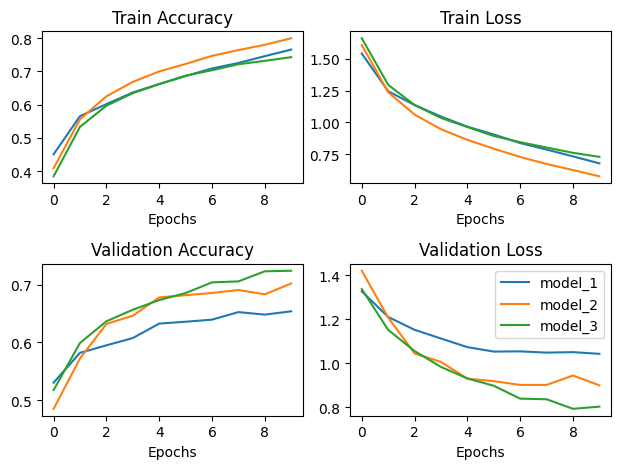

In [145]:
# Start code

# Display the performance (accuracy, loss) on train and validation data

# Train Accuracy
fig = plt.figure()
ax = fig.add_subplot(221)
ax.plot(history1.history["accuracy"])
ax.plot(history2.history["accuracy"])
ax.plot(history3.history["accuracy"])
ax.set_title("Train Accuracy")
ax.set_xlabel("Epochs")

# Train Loss
ax2 = fig.add_subplot(222)
ax2.plot(history1.history["loss"])
ax2.plot(history2.history["loss"])
ax2.plot(history3.history["loss"])
ax2.set_title("Train Loss")
ax2.set_xlabel("Epochs")

# Validation Accuracy
ax3 = fig.add_subplot(223)
ax3.plot(history1.history["val_accuracy"])
ax3.plot(history2.history["val_accuracy"])
ax3.plot(history3.history["val_accuracy"])
ax3.set_title("Validation Accuracy")
ax3.set_xlabel("Epochs")

# Validation Loss
ax4 = fig.add_subplot(224)
ax4.plot(history1.history["val_loss"])
ax4.plot(history2.history["val_loss"])
ax4.plot(history3.history["val_loss"])
ax4.set_title("Validation Loss")
ax4.set_xlabel("Epochs")

plt.legend(["model_1", "model_2", "model_3"])
plt.tight_layout()
plt.show()

# End code

#### 1.7.2. Display the test performance scores on baseline model_1, model_2 and model_3

Points 1

In [146]:
# Start code

loss1, accuracy1 = model_1.evaluate(x_test, y_test, verbose = 0)
loss2, accuracy2 = model_2.evaluate(x_test, y_test, verbose = 0)
loss3, accuracy3 = model_3.evaluate(x_test, y_test, verbose = 0)

print('Model 1 Test Loss:', loss1)
print('Model 1 Test Accuracy:', accuracy1)
print('Model 2 Test Loss:', loss2)
print('Model 2 Test Accuracy:', accuracy2)
print('Model 3 Test Loss:', loss3)
print('Model 3 Test Accuracy:', accuracy3)

# End code

Model 1 Test Loss: 1.0541763305664062
Model 1 Test Accuracy: 0.6473000049591064
Model 2 Test Loss: 0.9103708863258362
Model 2 Test Accuracy: 0.7019000053405762
Model 3 Test Loss: 0.8045763969421387
Model 3 Test Accuracy: 0.7236999869346619


## Task 8: Final summary and insights

##Points 2

### Write a report summarizing your findings and insights.

- Compare and analyze the results with the different models.
- Provide inference results and discuss any limitations or areas for further improvement.

Points 2

**Answer** :

From examining the graphs for train (accuracy and loss) and validation (accuracy and loss), I am able to see how the different models performed in comparison to each other.

By looking at the train loss graph, I am able to see that model_1 and model_2 experienced overfitting because the plot of the training loss seems to continuly decrease. As predicted in Section 5.2, adding the dropout layers in model_3 seem to help with the overfitting issue as the plot of training loss seems to plateau near the end compared to model_1 and model_2.

Looking at the train accuracy and validation accuracy graph, model_1's training accuracy seems to improve while the validation accuracy seems to worsen. I believe that this shows that model_1 was experiencing overfitting. On the other hand, model_2 and model_3's validation accuracy seem to keep up with the train accuracy.

From this assignment, it can be seen that by adding useful amounts of convolutional and max pooling layers as well as dropout layers, the model performance improves. In order to make further improvements, I think that by adding a useful amount of Dropouts, Dense hidden layers, and convolutional layers could help improve the performance. Therefore, I think all in all, experimenting with different layers and improving the network design would have a significant effect on the performance.